<a href="https://colab.research.google.com/github/roannarum/Data-Practice/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction dengan Metodologi Knowledge Discovery and Data Mining KDD
### oleh: Herdiesel Santoso

DataSet : https://www.kaggle.com/datasets/blastchar/telco-customer-churn


Artikel Sumber : 
1. https://medium.com/@hafizmrf3/penerapan-data-science-pada-marketing-customer-churn-prediction-python-de43eed149a4 

2. https://deepnote.com/@yulius-riski-kristiawan/Customer-Churn-Prediction-using-Machine-Learning-9e826160-f9d2-4f80-8185-a1d1200906b0

3. https://galihbahtera.medium.com/prediksi-churn-dari-customer-menggunakan-machine-learning-dan-python-4cacf435f743

4. https://kakazidane2000.medium.com/memprediksi-customer-churn-dengan-menggunakan-supervised-machine-learning-6b7b945d41a3

5. https://medium.com/@techtangent.in/visualizing-the-telco-churn-dataset-and-picking-up-the-important-features-94bc154e4153

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Penetapan Tujuan dan Pemahaman Aplikasi**

**Latar Belakang :** Menurut Zeniarja, J., & Luthfiarta, A. (2015) Pelanggan adalah aset yang paling penting dari semua jenis bisnis. Prospek usaha hanya mungkin dapat dilakukan dengan kehadiran pelanggan yang puas yang selalu setia dan membangun hubungan mereka dengan perusahaan. Untuk alasan ini, perusahaan harus merencanakan dan menerapkan strategi untuk menciptakan pelanggan,umumnya dikenal sebagai Customer Relationship Management (CRM).

Customer Relationship Management (CRM) merupakan strategi bisnis yang bertujuan untuk mengelola hubungan dengan pelanggan yang memadukan proses antara manusia dan teknologi. Sistem CRM bertujuan untuk membantu, mempertahankan, mengelola, dan meningkatkan hubungan pelanggan setia dan langgeng atau di sebut juga dengan proses menejemen Churn. Churn prediction bertujuan untuk memprediksi peluang seorang pelanggan untuk churn/kehilangan pelanggan dari suatu bisnis sebelum pelanggan tersebut benar-benar melakukannya, dengan demikian provider bisa memberikan treatment untuk meminimalisir kemungkinan mereka churn. 


**Tujuan :** Melakukan Prediksi dengan menggunakan machine learning dengan sebuah algoritme supervised learning untuk mengklasifikasikan pelanggan menjadi churn atau tidak churn di masa mendatang. 



# **Data Selection**

**Jenis Dataset :** Dataset yang digunakan adalah dataset pelanggan telekomunikasi (Telco), yang dapat diakses secara public di https://www.kaggle.com/datasets/blastchar/telco-customer-churn. 

Berikut beberapa library yang dapat membantu kita dalam melakukan pemodelan pada kasus ini, diantaranya:
*   Pandas (untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data).
*   Matplotlib (untuk visualisasi data seperti membuat plot grafik).
*   Seaborn (membuat plot Matplotlib tradisional terlihat lebih menarik)
*   Scikit-learn (menyediakan algoritma Machine Learning baik untuk pemodelan).
*   XGboost (khusus untuk algoritma eXtreme Gradient Boosting).
*   Pickle (implementasi protokol biner untuk serializing dan de-serializing dari struktur objek pada Python).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [6]:
df_load = pd.read_csv('/content/drive/MyDrive/Dataset/telco_dataset.csv')
#Tampilkan 5 data teratas
print(df_load.head())

   UpdatedAt   customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0     202006  45759018157  Female            No     Yes       1           No   
1     202006  45315483266    Male            No     Yes      60          Yes   
2     202006  45236961615    Male            No      No       5          Yes   
3     202006  45929827382  Female            No     Yes      72          Yes   
4     202006  45305082233  Female            No     Yes      56          Yes   

  StreamingTV InternetService PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No             Yes              Yes           29.85         29.85   
1          No              No              Yes           20.50       1198.80   
2         Yes             Yes               No          104.10        541.90   
3         Yes             Yes              Yes          115.50       8312.75   
4         Yes             Yes               No           81.25       4620.40   

  Churn  
0    No  
1    No  
2   Yes 

In [7]:
# Menampilkan Baris dan Kolom dari dataset
print(df_load.shape)

(6950, 13)


In [8]:
# Melihat semua kolom dalam dataset
print(df_load.columns)

Index(['UpdatedAt', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'tenure', 'PhoneService', 'StreamingTV', 'InternetService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [9]:
#Tampilkan jumlah ID yang unik
print(df_load.customerID.nunique())

6950


In [10]:
# Menampilkan informasi feature dari Dataset
print(df_load.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB
None


Dataset customer chrun yang digunakan terdiri dari dari 13 Feature, yaitu :
*   UpdateAt: Tanggal dicatatnya data, tipe data Numerik.
*   Customer ID: Indeks pelanggan, tipe data Numerik.
*   Gender: Jenis kelamin pelanggan, tipe data Nominal. Kolom ini memiliki 2 nilai: male dan female.
*   SeniorCitizen: Pelanggan adalah warga negara senior,  tipe data Nominal. Kolom ini memiliki 2 nilai yaitu 0 dan 1.
*   Partners: Pelanggan memiliki mitra/pasangan, tipe data Nominal. Kolom ini memiliki 2 nilai, yaitu: Yes dan No.
*   Tenure: Jumlah bulan pelanggan menggunakan layanan perusahaan, tipe data Numerik.
*   PhoneService: Pelanggan memiliki layanan telepon, tipe data Nominal. Kolom ini memiliki 2 nilai, yaitu Yes dan No.
*   StreamingTV: Pelanggan memiliki layanan streaming televisi, tipe data Nominal. Kolom ini memiliki 2 nilai yaitu Yes dan No.
*   InternetService: Penyedia layanan internet pelanggan, tipe data Nominal. Kolom ini mempunyai 2 nilai yaitu Yes dan No.
*   PaperlessBilling: Pelanggan memiliki tagihan tanpa kertas, tipe data Nominal. Kolom ini memiliki 2 nilai yaitu: Yes dan No.
*   MonthlyCharges: Ini adalah jumlah yang dibebankan kepada pelanggan setiap bulan, tipe data Numerik.
*   TotalCharges: Jumlah total layanan yang dibebankan kepada pelangga, tipe data Numerik.
*   Churn: Kategori pelanggan churn atau tidak, tipe data Nominal. Kolom ini memiliki 2 nilai yaitu Yes dan No.

Dataset memiliki jumlah record/baris 6950, dengan keseluruhannya Customer ID unik.

Untuk atribut **'UpdatedAt' dan 'customerID'**, merupakan atribut metadata, tidak berpengaruh terhadap pernentuan apakah pelanggan Chrun atau Tidak. Sedangkan atribut **'gender', 'SeniorCitizen', 'Partner', 'tenure', 'PhoneService', 'StreamingTV', 'InternetService' 'PaperlessBilling', 'MonthlyCharges', dan  'TotalCharges'** merupakan atribut Feature. Atribut **'Churn'** merupakan atribut Label/Target yang akan kita gunakan untuk klasifikasi.







Terdapat 6950 data pelanggan unik dengan tenure rata-rata masa berlangganan pelanggan adalah 32.49 bulan dengan paling sebentar adalah 1 bulan dan paling lama 124 bulan. Lalu, untuk kolom MonthlyCharges rata-rata pelanggan menghabiskan biaya 64.99 dolar/bulan dengan paling murah adalah 18.55 dolar/bulan dan paling mahal 169.93 dolar/bulan. Selanjutnya, untuk kolom TotalCharges rata-rata pelanggan menghabiskan 2286.05 dollar dengan paling murahnya adalah 19 dolar dan paling mahalnya adalah 8889.13 dolar.

# **Preprocessing Data**

Proses Preprocessing mencakup antara lain : pengecekan missing value (data yang hilang), membuang duplikasi data, memperbaiki kesalahan pada data, label encoding dll. 

## Pengecakan Missing Value

Pengecekan missing value sangat penting untuk melihat apakah data yang terdapat di dataset ada yang kosong atau tidak. Hal ini dikarenakan kosongnya data yang terdapat di dataset akan mengganggu dalam proses pemodelan.

In [ ]:
df_load.isnull().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
StreamingTV         0
InternetService     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df_load.isna().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
StreamingTV         0
InternetService     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Setelah melakukan pengecakan terhadap setiap kolom, tidak ditemukan kolom yang memiliki data missing value. Semua datanya lengkap.

## Memperbaiki kesalahan pada Data

In [ ]:
df_load.describe()

,UpdatedAt,customerID,tenure,MonthlyCharges,TotalCharges
count,6950.0,6.950000e+03,6950.000000,6950.000000,6950.000000
mean,202006.0,4.549898e+10,32.423165,64.992201,2286.058750
std,0.0,2.854091e+08,24.581073,30.032040,2265.702553
min,202006.0,4.500026e+10,0.000000,0.000000,19.000000
25%,202006.0,4.525607e+10,9.000000,36.462500,406.975000
50%,202006.0,4.549871e+10,29.000000,70.450000,1400.850000
75%,202006.0,4.574384e+10,55.000000,89.850000,3799.837500
max,202006.0,4.599959e+10,124.000000,169.931250,8889.131250


Terdapat 6950 data pelanggan unik dengan tenure rata-rata masa berlangganan pelanggan adalah 32.42 bulan dengan paling sebentar adalah 0 bulan dan paling lama 124 bulan. Jika kita lakukan analisis, nilai TotalCharger adalah perkalian antara tenure dan MonthlyCharges. Jika tenure atau MonthlyCharges = 0 dolar harusnya memberikan nilai TotalCharger = 0 dolar (karena ada yang berlangganan hanya 0 bulan jadi saat dikalikan dengan MonthlyCharges menjadi 0). Karena itu dapat disimpulkan, ada kesalahan data khususnya di Kolom teanure, MonthlyCharges dan TotalCharger.

Kita tampilkan customer yang memiliki tenure = 0 atau MonthlyCharges = 0.

In [ ]:
# Tampilkan customer yang memiliki tenure = 0 atau MonthlyCharges = 0

df = df_load.loc[(df_load['tenure'] == 0) | (df_load['MonthlyCharges'] == 0)]

df

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
623,202006,45292318527,Male,No,Yes,0,Yes,No,No,Yes,19.70,1400.85,No
945,202006,45321311527,Male,No,Yes,0,Yes,No,No,No,25.35,1400.85,No
1230,202006,45682399467,Male,No,No,28,Yes,No,No,No,0.00,534.70,No
1478,202006,45252097001,Female,No,Yes,0,Yes,No,No,No,20.00,1400.85,No
2394,202006,45277595655,Male,No,No,0,Yes,No,Yes,Yes,61.90,1400.85,No
2423,202006,45407521496,Female,No,Yes,0,Yes,Yes,Yes,No,73.35,1400.85,No
3762,202006,45570921557,Female,No,Yes,0,Yes,Yes,Yes,No,80.85,1400.85,No
3809,202006,45436746415,Male,No,Yes,0,Yes,No,No,No,25.75,1400.85,No
4180,202006,45137142615,Female,No,Yes,0,No,Yes,Yes,No,56.05,1400.85,No
4794,202006,45311535354,Male,No,No,0,Yes,No,No,No,20.25,1400.85,No


Terlihat bahwa pelanggan memiliki target chrun = No, harusnya pelanggan tersebut tergolong pelanggan Setia dan tidak mungkin memiliki tenure = 0 begitu juga MonthlyCharges = 0.

Karena itu untuk pelanggan yang memiliki nilai tenure = 0, isi dengan rumus **TotalCharges/MonthlyCharges**.

Sedangkan untuk pelanggan yang memiliki nilai MonthlyCharges = 0, isi dengan rumus **TotalCharges/tenure**.

Jika tidak yakin apakah **TotalCharges = MonthlyCharges x tenure**, bisa dicek terlebih dahulu.

In [ ]:
# Cek apakah TotalCharges = MonthlyCharges x tenure

df_load['NewTotalCharges'] = df_load['tenure'] * df_load['MonthlyCharges']
df_load['Perbandingan'] = df_load['NewTotalCharges'] - df_load['TotalCharges']

df_load['NewTotalCharges'].astype('float')

df_load[['tenure', 'MonthlyCharges', 'TotalCharges', 'NewTotalCharges', 'Perbandingan']]

,tenure,MonthlyCharges,TotalCharges,NewTotalCharges,Perbandingan
0,1,29.85,29.85,29.85,0.00
1,60,20.50,1198.80,1230.00,31.20
2,5,104.10,541.90,520.50,-21.40
3,72,115.50,8312.75,8316.00,3.25
4,56,81.25,4620.40,4550.00,-70.40
...,...,...,...,...,...
6945,1,44.75,44.75,44.75,0.00
6946,1,70.15,70.15,70.15,0.00
6947,1,85.55,85.55,85.55,0.00
6948,72,117.15,8529.50,8434.80,-94.70


In [ ]:
# Pelanggan yang memiliki nilai tenure = 0, isi dengan rumus TotalCharges/MonthlyCharges
df_load["tenure"].loc[df_load['tenure'] == 0] = df_load["TotalCharges"] / df_load['MonthlyCharges']

# Pelanggan yang memiliki nilai MonthlyCharges = 0, isi dengan rumus TotalCharges/tenure
df_load["MonthlyCharges"].loc[df_load['MonthlyCharges'] == 0] = df_load["TotalCharges"] / df_load['tenure'] 

df_load.describe()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,UpdatedAt,customerID,tenure,MonthlyCharges,TotalCharges,NewTotalCharges,Perbandingan
count,6950.0,6.950000e+03,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,202006.0,4.549898e+10,32.495291,64.994948,2286.058750,2289.650848,3.592098
std,0.0,2.854091e+08,24.568520,30.026966,2265.702553,2272.728558,167.468285
min,202006.0,4.500026e+10,1.000000,18.550000,19.000000,0.000000,-1400.850000
25%,202006.0,4.525607e+10,9.000000,36.462500,406.975000,399.700000,-28.900000
50%,202006.0,4.549871e+10,29.000000,70.450000,1400.850000,1399.475000,0.000000
75%,202006.0,4.574384e+10,55.815089,89.850000,3799.837500,3800.337500,29.337500
max,202006.0,4.599959e+10,124.000000,169.931250,8889.131250,12235.050000,4923.800000


Terdapat 6950 data pelanggan unik dengan tenure rata-rata masa berlangganan pelanggan adalah 32.49 bulan dengan paling sebentar adalah 1 bulan dan paling lama 124 bulan. Lalu, untuk kolom MonthlyCharges rata-rata pelanggan menghabiskan biaya 64.99 dolar/bulan dengan paling murah adalah 18.55 dolar/bulan dan paling mahal 169.93 dolar/bulan. Selanjutnya, untuk kolom TotalCharges rata-rata pelanggan menghabiskan 2286.05 dollar dengan paling murahnya adalah 19 dolar dan paling mahalnya adalah 8889.13 dolar.

## Menghapus variabel-variabel yang tidak dibutuhkan (unnecessary variables) untuk pemodelan

In [ ]:
# hapus variabel customerID dan UpdatedAt dari dataset
cleaned_df = df_load.drop(['customerID', 'UpdatedAt'], axis=1)
print(cleaned_df.head())

   gender SeniorCitizen Partner  tenure PhoneService StreamingTV  \
0  Female            No     Yes     1.0           No          No   
1    Male            No     Yes    60.0          Yes          No   
2    Male            No      No     5.0          Yes         Yes   
3  Female            No     Yes    72.0          Yes         Yes   
4  Female            No     Yes    56.0          Yes         Yes   

  InternetService PaperlessBilling  MonthlyCharges  TotalCharges Churn  \
0             Yes              Yes           29.85         29.85    No   
1              No              Yes           20.50       1198.80    No   
2             Yes               No          104.10        541.90   Yes   
3             Yes              Yes          115.50       8312.75    No   
4             Yes               No           81.25       4620.40    No   

   NewTotalCharges  Perbandingan  
0            29.85          0.00  
1          1230.00         31.20  
2           520.50        -21.40  
3     

## Label Encoding data

Langkah selanjutnya adalah mengubah nilai dari data untuk fitur-fitur layanan menjadi hanya ‘Yes’ dan ‘No’ atau representasi boolean numeriknya yakni 1 dan 0. 

Kemudian, fitur Churn juga perlu direpresentasikan sebagai boolean numerik yakni 1 dan 0, agar mudah dilakukan analisis. Walaupun bentuk datanya berupa angka numerik 1 dan 0, tetapi tipe datanya tetaplah Nominal. 

Untuk mengubah nilai tersebut, buat dataframe baru sebagai copy dari data yang variabel data_load agar tidak mengubah fitur yang ada pada data yang asli.

In [ ]:
from sklearn.preprocessing import LabelEncoder
#konversi semua variabel tipe non-numerikal ke tipe numerikal  
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    #terapkan encoding pada tiap variabel non-numerikal
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df)

      gender  SeniorCitizen  Partner  tenure  PhoneService  StreamingTV  \
0          0              0        1     1.0             0            0   
1          1              0        1    60.0             1            0   
2          1              0        0     5.0             1            1   
3          0              0        1    72.0             1            1   
4          0              0        1    56.0             1            1   
...      ...            ...      ...     ...           ...          ...   
6945       1              0        0     1.0             1            0   
6946       0              1        0     1.0             1            0   
6947       0              0        0     1.0             1            1   
6948       0              0        1    72.0             1            1   
6949       1              0        0    64.0             1            0   

      InternetService  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  \
0                  

<ipython-input-15-51795edc2954>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue


## Splitting data (Memisahkan data train dan data test)

Dataset yang kita gunakan untuk pemodelan yaitu terbagi menjadi 2 tipe, data train dan data test. Pada kasus ini saya membagi data 70% untuk data train dan 30% untuk data test. Dimana variabel x sebagai predictor dan variabel y sebagai targetnya.

In [ ]:
from sklearn.model_selection import train_test_split

# Predictor -> X dan target -> y
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']

# Splitting data train dan data test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Print deskripsi
print('Jumlah baris dan kolom dari x_train adalah: ', x_train.shape, ', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Persentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape, ', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Persentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah:  (4865, 12) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Persentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 12) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Persentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


# **Pemodelan Data Mining untuk Prediksi dan Klasifikasi**

## a. Pemodelan dengan metode Logistic Regression

Model machine learning yang pertama digunakan yaitu Logistic Regression. Logistic Regression ini metode yang biasa digunakan untuk memprediksi probabilitas suatu kejadian atau dapat disebut dengan penentuan regresi binomial. Terminologi ‘Binomial’ disini diartikan bahwa hanya ada 2 kemungkinan yang menjadi hasil output dari model machine learning yang akan dibangun. Model Logistic Regression ini kita terapkan pada output variabel Churn yang hanya berisi 1 (ya, churn) atau 0 (tidak). 

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: \n',log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


Performa Pada Data Training.

Setelah model dibuat, maka lakukan perhitungan untuk memperoleh classification report dan confusion matrix dari data train dengan source code dan hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [ ]:
#Menampilkan hasil training dengan confusion matrix
from sklearn.metrics import classification_report
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3575
           1       0.59      0.55      0.57      1290

    accuracy                           0.78      4865
   macro avg       0.72      0.71      0.71      4865
weighted avg       0.78      0.78      0.78      4865



Dari data training dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi sebesar 80%, dengan detail prediksi Churn yang sebenarnya Churn adalah 640, prediksi tidak Churn yang sebenarnya tidak Churn adalah 3237, prediksi tidak Churn yang sebenarnya Churn adalah 650 dan prediksi churn yang sebenarnya tidak churn adalah 338.

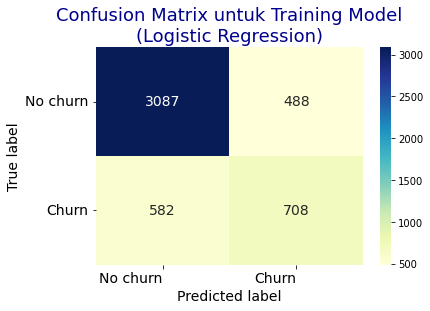

In [ ]:
#Menampilkan hasil training model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Performa Model pada Data Test

Lakukan perhitungan untuk memperoleh classification report dan confusion matrix juga pada data test dengan source code dan hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [ ]:
#Menampilkan hasil testing model dengan confusion matrix
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1539
           1       0.60      0.53      0.56       546

    accuracy                           0.78      2085
   macro avg       0.72      0.70      0.71      2085
weighted avg       0.78      0.78      0.78      2085



Dari data testing dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi sebesar 79%, dengan detail prediksi Churn yang sebenarnya churn adalah 264, prediksi tidak Churn yang sebenarnya tidak Churn adalah 1393, prediksi tidak churn yang sebenarnya Churn adalah 282 dan prediksi Churn yang sebenarnya tidak Churn adalah 146.

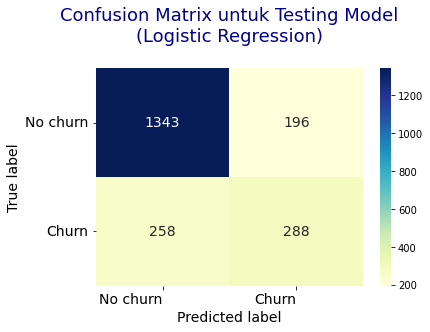

In [ ]:
#Menampilkan hasil testing model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

## b. Pemodelan dengan metode Random Forest

Random Forest sebagai gabungan dari Decision Tree. Jumlah decision tree akan mempengaruhi akurasi random forest secara keseluruhan.

Performa Model pada Data Train

Setelah model dibuat, maka lakukan perhitungan untuk memperoleh classification report dan confusion matrix dari data train dengan source code dan hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Latih model dengan RandomForestClassifier()
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier()


In [ ]:
# Menampilkan hasil training dengan confusion matrix
from sklearn.metrics import classification_report

# Predict
y_train_pred = rdf_model.predict(x_train)

# Print classification report 
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



Dari data training dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi sempurna 100%, dengan detail prediksi Churn yang sebenarnya Churn adalah 1276, prediksi tidak Churn yang sebenarnya tidak Churn adalah 3568, prediksi tidak Churn yang sebenarnya Churn adalah 14 dan prediksi churn yang sebenarnya tidak churn adalah 7.

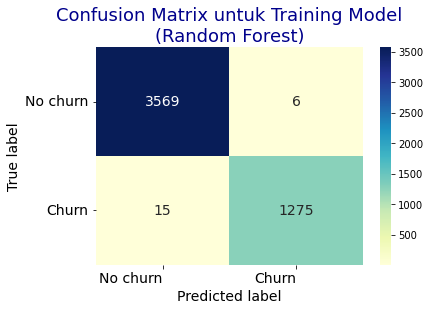

In [ ]:
#Menampilkan hasil training model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)

plt.title('Confusion Matrix untuk Training Model\n(Random Forest)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Performa Model pada Data Test

Lakukan perhitungan untuk memperoleh classification report dan confusion matrix juga pada data test dengan source code dan hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [ ]:
#Menampilkan hasil testing model dengan confusion matrix
# Predict
y_test_pred = rdf_model.predict(x_test)

# Print classification report
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.60      0.47      0.53       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.77      0.78      0.77      2085



Dari data testing dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi sebesar 78%, dengan detail prediksi Churn yang sebenarnya churn adalah 263, prediksi tidak Churn yang sebenarnya tidak Churn adalah 1356, prediksi tidak churn yang sebenarnya Churn adalah 283 dan prediksi Churn yang sebenarnya tidak Churn adalah 183.

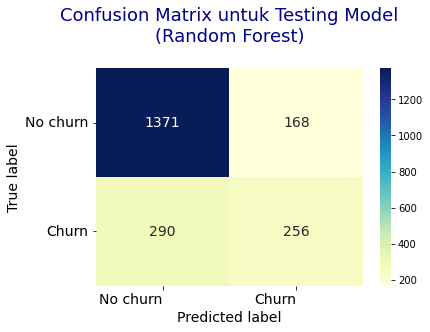

In [ ]:
#Menampilkan hasil testing model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)

plt.title('Confusion Matrix untuk Testing Model\n(Random Forest)\n', fontsize=18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

## c. Pemodelan dengan metode Gradient Boosting

XGBoost merupakan akronim dari eXtreme Gradient Boosting. Dengan XGBoost, model yang dibangun dapat mengoptimalkan sumber daya komputasi berdasarkan algoritma tree. XGBoost digunakan pada kasus ini juga karena:

*   Execution Speed (Memory Efficient)
*   Model Performance ( High Accuracy )

Selanjutnya, untuk menggunakan algoritma GradientBoosting, kita dapat import dari module sklearn.ensemble. Cukup gunakan function GradientBoostingClassifier() untuk melakukan training data.

Performa Model pada Data Train

Setelah model dibuat, maka lakukan perhitungan untuk memperoleh classification report dan confusion matrix dari data train dengan source code dan hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Latih model dengan GradientBoostingClassifier()
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


In [ ]:
# Menampilkan hasil training dengan confusion matrix
from sklearn.metrics import classification_report

# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Gradien Boosting) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradien Boosting) :
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3575
           1       0.71      0.54      0.62      1290

    accuracy                           0.82      4865
   macro avg       0.78      0.73      0.75      4865
weighted avg       0.81      0.82      0.81      4865



Dari data training dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi 82%, dengan detail prediksi Churn yang sebenarnya Churn adalah 684, prediksi tidak Churn yang sebenarnya tidak Churn adalah 3286, prediksi tidak Churn yang sebenarnya Churn adalah 606 dan prediksi churn yang sebenarnya tidak churn adalah 289.

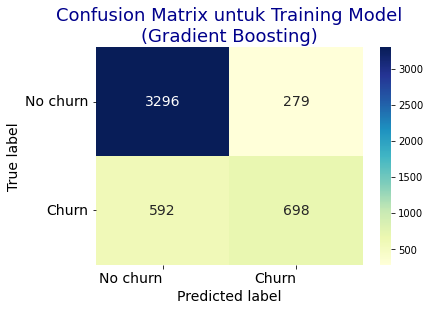

In [ ]:
#Menampilkan hasil training model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws ={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Performa Model pada Data Test

Lakukan perhitungan untuk memperoleh classification report dan confusion matrix juga pada data test dengan source code dan hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [ ]:
# Menampilkan hasil testing model dengan confusion matrix
# Predict
y_test_pred = gbt_model.predict(x_test)

# Print classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.49      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.79      0.78      2085



Dari data testing dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi sebesar 79%, dengan detail prediksi Churn yang sebenarnya churn adalah 261, prediksi tidak Churn yang sebenarnya tidak Churn adalah 1395, prediksi tidak churn yang sebenarnya Churn adalah 285 dan prediksi Churn yang sebenarnya tidak Churn adalah 144.

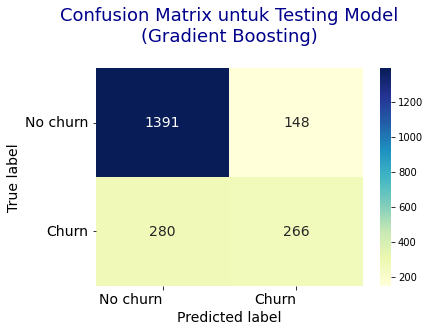

In [ ]:
#Menampilkan hasil testing model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Testing Model\n(Gradient Boosting)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# **Evaluation**



## Over-Fitting Vs Under-Fitting

Model yang baik adalah model yang mampu memberikan performa bagus di fase training dan testing model. Ada beberapa terminologi yang sering muncul ketika membahas bagaimana model yang baik, di antaranya:

*  Over-Fitting — suatu kondisi dimana model mampu memprediksi dengan sangat baik di fase training, akan tetapi tidak mampu memprediksi sama baiknya di fase testing.
*   Under-Fitting — suatu kondisi dimana model kurang mampu memprediksi dengan baik di fase training, akan tetapi mampu memprediksi dengan baik di fase testing.
*   Appropriate-Fitting — suatu kondisi dimana model mampu memprediksi dengan baik di fase training maupun di fase testing.








## Menentukan Algoritma Terbaik

Berdasarkan pemodelan yang telah dilakukan dengan menggunakan Logistic Regression, Random Forest dan Extreme Gradiant Boost, maka dapat disimpulkan untuk memprediksi Churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima Logistic Regression. Hal ini dikarenakan performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 80%, akurasi testing 79%), dilain sisi algoritma lainnya cenderung Over-Fitting performanya. Akan tetapi hal ini tidak menjadikan kita untuk menarik kesimpulan bahwsannya jika untuk melakukan pemodelan apapun maka digunakan Logistic Regression, kita tetap harus melakukan banyak percobaan model untuk menentukan mana yang terbaik. 

## Menyimpan Model Terbaik

Setelah menentukan model algoritma terbaik dari beberapa percobaan model yang sudah dilakukan (Appropriate-Fitting), kemudian kita dapat simpan model tersebut sebagai file best_model_churn.pkl dengan tujuan untuk deployment model nantinya kita tidak perlu mengulang lagi pemodelan, cukup memanggil file tersebut saja. Simpan di file direktori sesuai dataset berada, kemudian check apakah file tersebut benar tersimpan atau tidak. Gunakan dump() dari pickle untuk menyimpan file model.

In [ ]:
#Save Model log_model (Logistic Regression) sebagai model terbaik

pickle.dump(log_model, open('best_model_churn.pkl', 'wb'))

In [ ]:
print(log_model)

LogisticRegression()


# **Knowledge Presentation**

Pada fase terakhir ini yang dilakukan adalah proses pembentukan keluaran yang mudah dimengerti yang bersumber pada proses Data Mining 

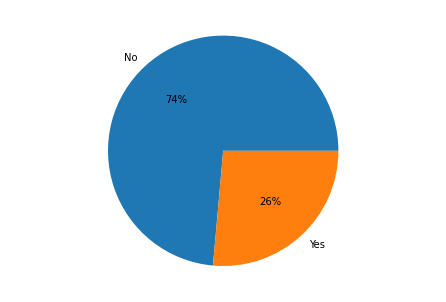

In [ ]:
#memvisualisasi persentase Churn pada dataset
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

Berdasarkan pie chart di atas, dapat disimpulkan bahwa sebaran data secara mayoritas customer tidak melakukan Churn, dengan detail Churn sebanyak 26% dan No Churn sebanyak 74%.

## Exploratory Data Analysis pada Variabel Numerik

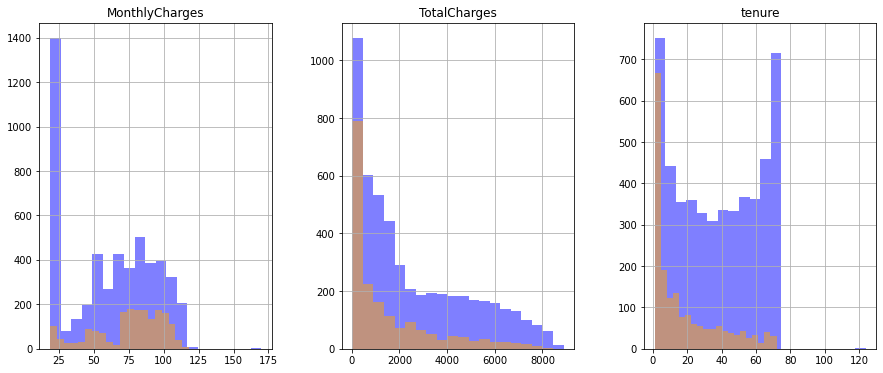

In [ ]:
# Membuat distribution diagram untuk 3 variabel numerik berikut 
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Gunakan code berikut ini untuk memplot 2 lapisan untuk membedakan mana yang Churn (Orange) atau Tidak (Blue) 
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

Keterangan : 

*   Sumbu X adalah biaya
*   Sumbu Y adalah jumlah pelanggan
*   Warna Biru adalah pelanggan Tidak Churn 
*   Warna Orange adalah pelanggan Churn


Pada histogram di atas, dapat kita ketahui bahwa untuk variabel MonthlyCharges ada kecenderungan bahwa semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn. Penyedia layanan dapat menetapkan harga disekitar 20 - 60 dolar/bulan untuk mengurangi kecenderungan melakukan churn.

Untuk TotalCharges terlihat tidak ada kecenderungan apapun terhadap Churn. 

Sedangkan variabel tenure ada kecenderungan bahwa semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn. Untuk mengurangi kecenderungan Churn, penyedia layanan minimal mempertahankan pelanggan antara 15 - 20 Bulan

## Exploratory Data Analysis pada Variabel Kategorikal

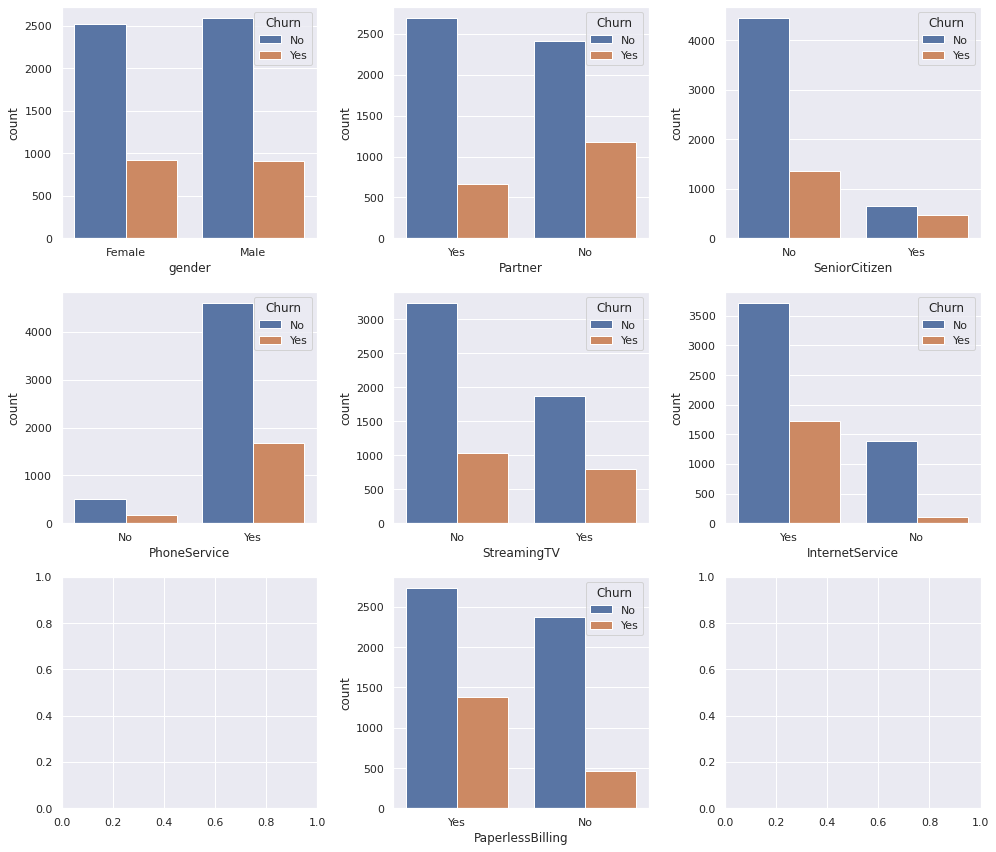

In [ ]:
sns.set(style='darkgrid')
# memplot data dengan subplot ukuran 3x3
fig, ax = plt.subplots(3, 3, figsize=(14, 12))

# menampilkan data berdasarkan variabel-variabel kategorikal yang ada
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

Keterangan : 

*   Sumbu X adalah Kategori Feature
*   Sumbu Y adalah jumlah pelanggan
*   Warna Biru adalah pelanggan Tidak Churn 
*   Warna Orange adalah pelanggan Churn

Pada visualisasi data di atas, dapat ketahui bahwa tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin (gender) dan layanan telfonnya (PhoneService).

Akan tetapi ada kecenderungan bahwa customer yang melakukan churn adalah customer yang tidak memiliki partner (partner: No), customer yang statusnya adalah senior citizen / usia > 60thn (SeniorCitizen: Yes), customer yang mempunyai layanan streaming TV (StreamingTV: Yes), customer yang mempunyai layanan Internet (internetService: Yes) dan customer yang tagihannya paperless (PaperlessBilling: Yes).